<h1>Barcelona Accident Distribution by Month and Day

In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot  as plt
import matplotlib.colors as mcolors
import numpy as np
mcolors.TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

<h4> If the credentials not using WIndows Authentications

cnxn_str = ("DRIVER={ODBC Driver 17 for SQL Server};"
            "SERVER=localhost,1433;"
            "DATABASE=MassiveInfinity;"
            "UID=sa;"
            "PWD=Abcd1234!;")

In [2]:
cnxn_str = ("DRIVER={Sql Server Native Client 11.0};"
            "SERVER=DESKTOP-7HPUML6;"
            "DATABASE=MassiveInfinity;"
            "TRUSTED_CONNECTION=yes")

In [3]:
cnxn = pyodbc.connect(cnxn_str)

In [4]:
df_accidents = pd.read_sql("SELECT * FROM accidents", cnxn)

In [5]:
df_accidents

,Id,District_Name,Neighborhood_Name,Street,Weekday,Month,Day,Hour,Part_of_the_day,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340046
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339428
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337669
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2017S003667,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Tuesday,April,25,8,Morning,1,0,1,3,2.201800,41.392002
10335,2017S001896,Sant Andreu,el Bon Pastor,PL MONTERREY ...,Wednesday,March,8,12,Morning,1,0,1,2,2.206013,41.443443
10336,2017S010718,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Thursday,December,28,8,Morning,1,0,1,2,2.205607,41.443893
10337,2017S006145,Sant Andreu,el Bon Pastor,Litoral (Besòs) ...,Friday,July,14,14,Afternoon,1,0,1,2,2.205118,41.444824


In [6]:
dfam = df_accidents.groupby(['Month']).count()

In [7]:
dfam

,Id,District_Name,Neighborhood_Name,Street,Weekday,Day,Hour,Part_of_the_day,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Longitude,Latitude
Month,,,,,,,,,,,,,,
April,845,845,845,845,845,845,845,845,845,845,845,845,845,845
August,652,652,652,652,652,652,652,652,652,652,652,652,652,652
December,762,762,762,762,762,762,762,762,762,762,762,762,762,762
February,824,824,824,824,824,824,824,824,824,824,824,824,824,824
January,844,844,844,844,844,844,844,844,844,844,844,844,844,844
July,918,918,918,918,918,918,918,918,918,918,918,918,918,918
June,908,908,908,908,908,908,908,908,908,908,908,908,908,908
March,935,935,935,935,935,935,935,935,935,935,935,935,935,935
May,963,963,963,963,963,963,963,963,963,963,963,963,963,963


<h2>Accidents Distribution by Months

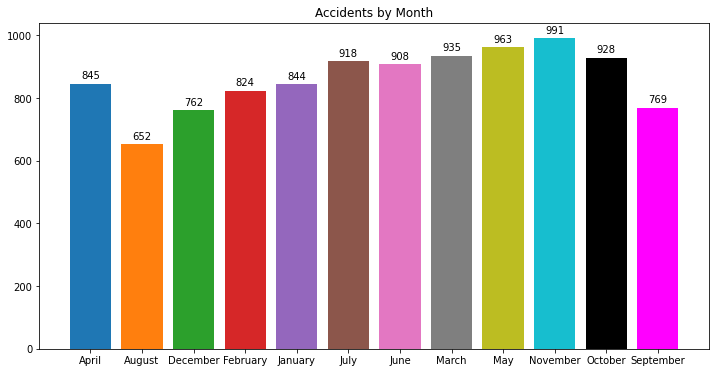

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
barmonth = ax.bar(dfam.index, dfam.Id, color=['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan',
'black',
'fuchsia'])
plt.title('Accidents by Month')
def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
        xy=(bar.get_x() + bar.get_width() / 2, bar_height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom'
    )
insert_data_labels(barmonth)
#ax.set_yticks(np.arange(len(dfa)))
#for i, v in enumerate(dfa.Id):
#    ax.text(v + 5, i -0.30, str(v), color='blue', fontweight='bold')
plt.show()

In [9]:
dfaw = df_accidents.groupby(['Weekday']).count()

In [10]:
dfaw

,Id,District_Name,Neighborhood_Name,Street,Month,Day,Hour,Part_of_the_day,Mild_injuries,Serious_injuries,Victims,Vehicles_involved,Longitude,Latitude
Weekday,,,,,,,,,,,,,,
Friday,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761,1761
Monday,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510
Saturday,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155
Sunday,895,895,895,895,895,895,895,895,895,895,895,895,895,895
Thursday,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677
Tuesday,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691
Wednesday,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650,1650


<h2>Accidents Distribution by Day

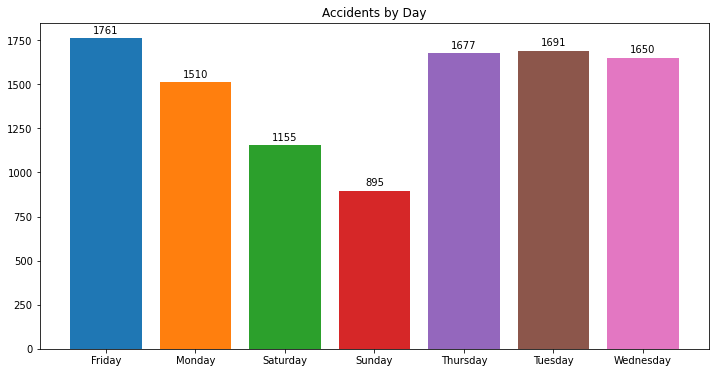

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
barday = ax.bar(dfaw.index, dfaw.Id, color=['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan',
'black',
'fuchsia'])
plt.title('Accidents by Day')
def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
        xy=(bar.get_x() + bar.get_width() / 2, bar_height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom'
    )
insert_data_labels(barday)
#ax.set_yticks(np.arange(len(dfa)))
#for i, v in enumerate(dfa.Id):
#    ax.text(v + 5, i -0.30, str(v), color='blue', fontweight='bold')
plt.show()